## Lending Club Case Study


### Objective

#### To analyse the driving factors loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment

In [634]:
# Loading the Python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [501]:
#reading the dataset(csv) file to python dataframe
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [502]:
# structural summary of the csv
loan.shape

(39717, 111)

In [503]:
#see the sample values in the df which were loaded from csv
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### DATA CLEANING 

In [508]:
# Finding out the missing values per column
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [509]:
#columns in the data with 100% missing values.removing them
loan = loan.drop(list(missing[missing >= 50].index),axis=1)
loan.shape

(39717, 54)

In [510]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [511]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [512]:
# Checking the unique values for emp_length,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,
# & tax_liens
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [513]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [514]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [515]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [516]:
loan.tax_liens.unique()

array([ 0., nan])

In [517]:
#The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or nan.
#Dropping.
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [518]:
loan.shape

(39717, 51)

In [519]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title                6.19
emp_length               2.71
desc                    32.58
title                    0.03
revol_util               0.13
last_pymnt_d             0.18
last_credit_pull_d       0.01
pub_rec_bankruptcies     1.75
dtype: float64

In [520]:
#columns title, revol_util and last_pymnt_d have a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.
#We can go ahead and delete rows with null value
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]


In [521]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title                6.18
emp_length               2.69
desc                    32.57
last_credit_pull_d       0.01
pub_rec_bankruptcies     1.76
dtype: float64

In [523]:
#From earlier data :pub_rec_bankruptcies taking values like [0,1,2]. 
#Almost 37218 records- 0 record of bankrupcies, 
#1667 - 1 record of  bankrupcies & 7 records with 2 bankrupcies. So the mode is '0' here with most records.H
# Hence not of imporstance , we can drop.
loan.pub_rec_bankruptcies.value_counts()

0.0    37218
1.0     1667
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [524]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [525]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title      6.18
emp_length     2.74
desc          33.14
dtype: float64

In [526]:
#We can drop thr desc column as it only portrys the borrower comments & might not be helpful in our analysis.
#Regd the loan type we already have details in other columns.
loan = loan.drop('desc',axis=1)

In [527]:
#columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the 
#borrower like their job title and their employment length in years.The column info is imp, so we will just drop the columns
#with null values as the % is also low, compared to the amount of valid data we have .
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [528]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

In [529]:
#So the data set is now completely cleaned
loan.shape

(36433, 50)

In [530]:
loan.nunique()

id                         36433
member_id                  36433
loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7474
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
pymnt_plan                     1
url                        36433
purpose                       14
title                      17954
zip_code                     806
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util

In [531]:
#few columns having a single unique value or all unique values.Based upon the understanding provided from dict.csv 
#we can drop some columns which we might think not appt for our risk analysis on finding the loan defaulters.
columns_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan= loan.drop(columns_dropped,axis=1)

In [532]:
#Columns for analysis reduced to 38 columns.
loan.shape

(36433, 38)

In [533]:
# columns which denote date or month information
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


In [534]:
#Converting the dtype of these columns to datetime
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [535]:
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null datetime64[ns]
earliest_cr_line      36433 non-null datetime64[ns]
last_pymnt_d          36433 non-null datetime64[ns]
last_credit_pull_d    36433 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [536]:
loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [537]:
loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [538]:
# Stripping the '%' from the int_rate & revol_util
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [539]:
loan.int_rate.describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

In [540]:
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [541]:
#Binnig the emp_length in the groups 0-10 range
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan = loan.replace({"emp_length": emp_length_dict })

In [542]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [543]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [544]:
loan['term'] = loan.term.apply(lambda x: x.split()[0])

In [545]:
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [342]:
#As per the case study we must have loan data for all loans issued through the time period 2007 t0 2011.

In [546]:
loan.shape

(36433, 38)

In [547]:
# Extracting the date & year for the issue_d 
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [548]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year'],
      dtype='object')

In [347]:
loan=loan.drop_duplicates()
loan.shape

(36433, 40)

In [348]:
loan.to_csv('loan_master.csv', encoding='utf-8', index=False)

In [349]:
master = pd.read_csv('loan_master.csv', encoding='utf-8')

In [350]:
master.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [351]:
master.shape

(36433, 40)

In [352]:
#We are interested in loans that have been fully paid or charged off, 
#the loans with current status do not hold much importance.
master = master[master['loan_status'].isin(['Fully Paid','Charged Off'])]
master.shape

(35367, 40)

## DATA ANALYSIS

### Analysis on some important variables as of now by data visualization using matplotlib & seaborn libraries

##### The main driving factors for risk analysis as per our analysis are 
1. Loan_amount
2. Interest_rate
3. Annual_income
4. Loan_term
5. Purpose
6. home_ownership
7. Grade and Sub-Grade
8. Loan_Issue_Date
9. Emp_length
10. Verification_status
11. Loan_status
12. DTI
13. Public Record bankruptcies
14. open_acc
15. pub_rec
16. earliest_cr_line
17. last_credit_pull_d

### Univariate and Segmented Univariate Analysis

#### Analysing Key Column: Loan Status
- Number of loans over for each loan status
- Distribution of total accounts for each status

In [75]:
master.total_acc.describe()

count    35367.000000
mean        22.209206
std         11.403045
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

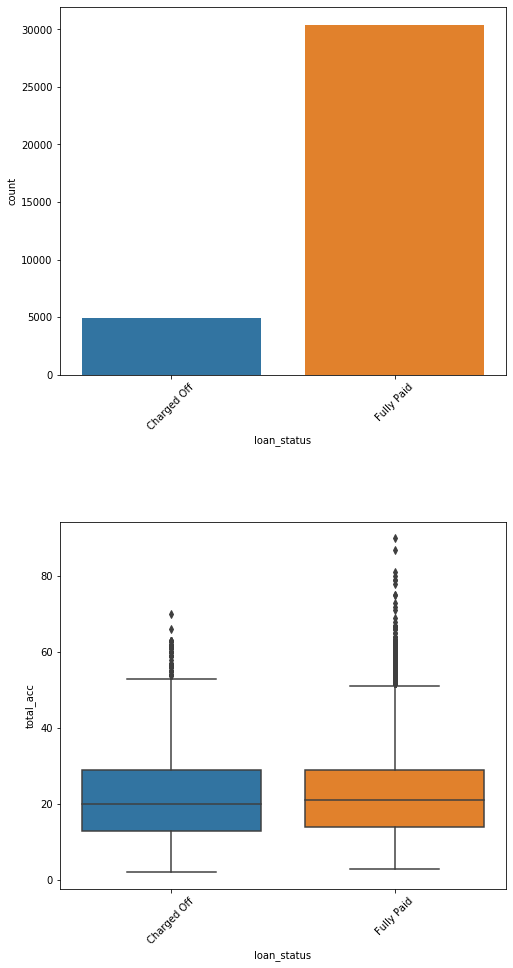

In [83]:
## Analysing loan status based on the loan_amount count,total number of credit lines in the loan holder(total_acc) &
## loan_amt.
f,ax =plt.subplots(2,1,figsize=(8,14))
plt.subplots_adjust(hspace = 0.4, top = 1.0)
tmp = master[['loan_status', 'total_acc', 'loan_amnt']]
s0 = sns.countplot(x="loan_status", data=tmp,ax=ax[0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)
#ax = master.groupby('loan_status').loan_amnt.count().plot.bar()
#showLabels(ax)
s1 = sns.boxplot(x="loan_status", y="total_acc", data=tmp,ax=ax[1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [112]:
round(master.loc[master['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master),2)

13.98

####  Inference:
- We see approx 13.98% of loans have been defaulted 
- The borrower credit line (total_acc) info shows a linear relationship between loan amount and customer credit ratings 

#### 1.Variable: loan_amnt
Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [84]:
#Variable: loan_amnt.
master.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


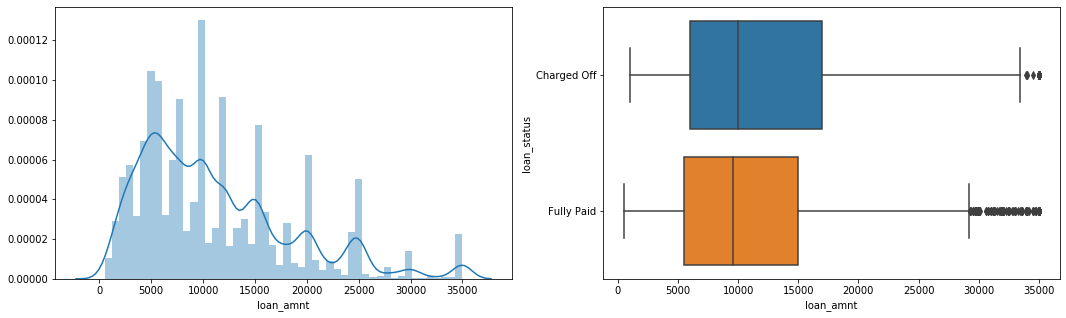

In [89]:
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(tmp['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=tmp['loan_amnt'], y=tmp['loan_status'], data=tmp)
plt.show()

#### Inference:
-  Requested loan amount is slightly higher for the low rating customers
-  Most of the loans granted are below 15000 (75 percentile value)
-  Funding amounts see a spike in & around 5000.
-  Charged off loans are towards higher average loan amount request.

In [ ]:
# There are categorical variables : 'term', 'home_ownership','verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'
# Other categorical variables distribution. TD

#### 2. Variable: int_rate
Data_Dictionary: Interest Rate on the loan.

In [90]:
master.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


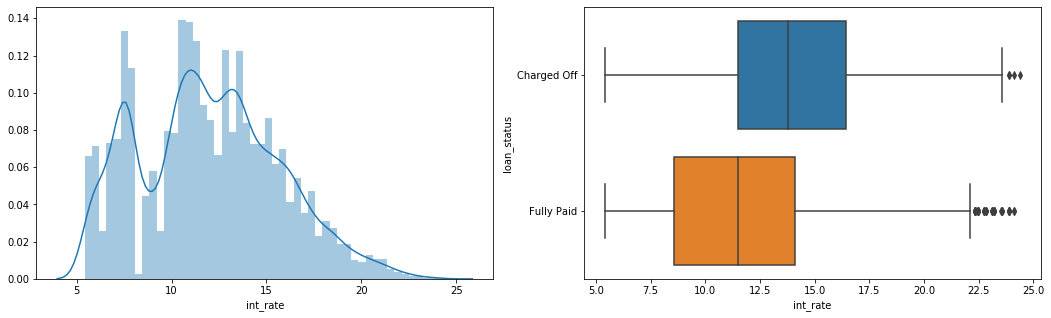

In [92]:
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(master['int_rate'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master['int_rate'], y=master['loan_status'], data=master)
plt.show()

#Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
#The intrest rate for Charged Off loans appear to be higher than for Fully paid. 
#As, the risk increases the rate of interest imposed on the loan also increases.

#### Inference
- Overall, the interest rate varies from 5.42% to 24.4% with average interest rate of 11.8%.
- And as expected the int rate for Charged Off loans appear to be higher than for Fully paid. 

#### 3.Variable: term
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

In [114]:
#analysis on the loan_term against the loan_amount count column
master.groupby('term').loan_amnt.count()

term
36    26377
60     8990
Name: loan_amnt, dtype: int64

Text(0.5, 0, 'Term')

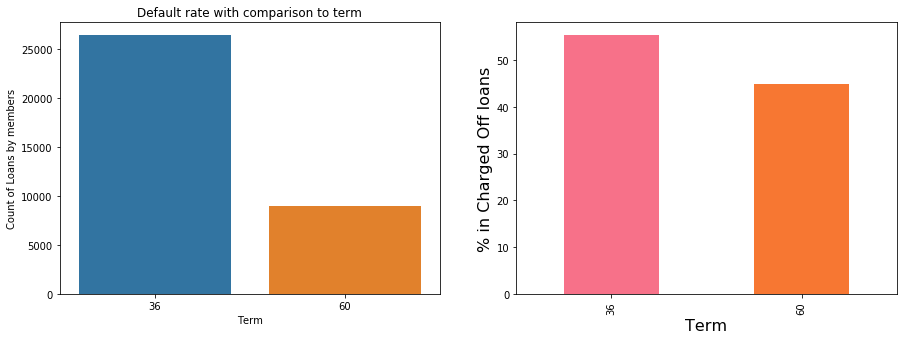

In [581]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(master['term'], order=sorted(master.term.unique()))
plt.xlabel("Term") 
plt.ylabel("Count of Loans by members") 
plt.title("Default rate with comparison to term") 
plt.subplot(1, 2, 2)
values = round(master.loc[master['loan_status']=='Charged Off']['term'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)
plt.set_xlabel('Term', fontsize=16)

#### Inference
- Most loans were taken for the shorter term ie.36 months(75%) and not 60(25%) months
- Though 25% of the count of loans are those given for 5 years but 45 % seems to be Charged Off,

#### 4. Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

In [122]:
# analysing the total number of pub_rec_bankruptcies for the defaulters dataframe
master.groupby('pub_rec_bankruptcies').loan_amnt.count()

pub_rec_bankruptcies
0.0    33898
1.0     1464
2.0        5
Name: loan_amnt, dtype: int64

Text(0, 0.5, '% of Loans Charged Off')

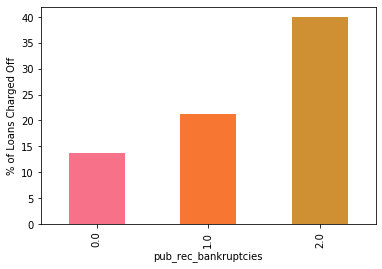

In [575]:
# We are checking 'pub_rec_bankruptcies' each bucket category count 
# against loan_status (default = 'Charged Off')
# Overall gross percenatge for each column
grp = master.groupby(['loan_status','pub_rec_bankruptcies'])['pub_rec_bankruptcies'].count()
cnt = master.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].count()
percentages = grp.unstack() * 100/cnt.T
plt = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% of Loans Charged Off')

#### Inference
- Most of the loans were provided to the customers who did not have any bankruptcies 
  but a 6% of the customers were provided loans even after the bankruptcies
- We see 40% of loans for type '2' of pub_rec_bankruptcies has been charged off.

#### 5. Variable: grade and sub_grade
Data_Dictionary: LC assigned loan grade and subgrade.

In [205]:
master.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

In [209]:
master.sub_grade.value_counts(normalize=True).head(2)

A4    0.075268
B3    0.073204
Name: sub_grade, dtype: float64

Text(0.5, 0, 'Grade')

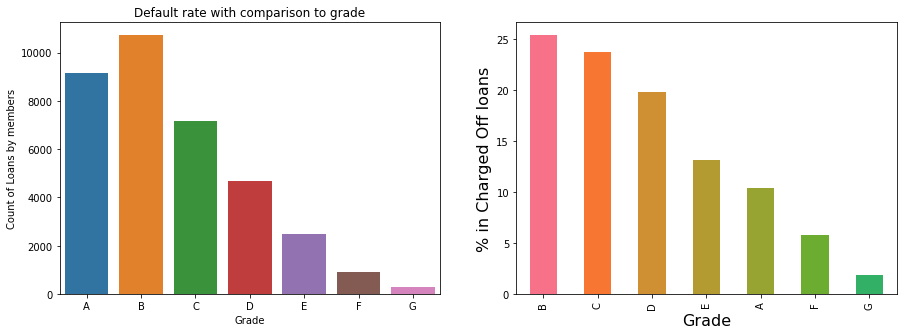

In [215]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(master['grade'], order=sorted(master.grade.unique()))
plt.xlabel("Grade") 
plt.ylabel("Count of Loans by members") 
plt.title("Default rate with comparison to grade") 
plt.subplot(1, 2, 2)
values = round(master.loc[master['loan_status']=='Charged Off']['grade'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)
plt.set_xlabel('Grade', fontsize=16)

Text(0.5, 1.0, 'Default rate with comparison to sub_grade')

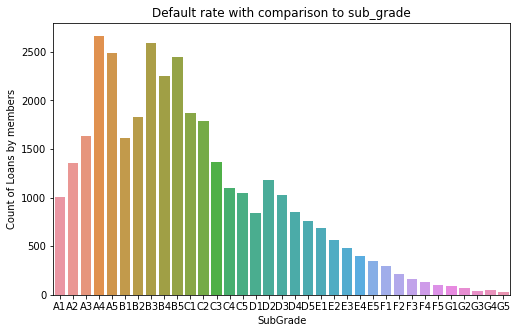

In [220]:
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.countplot(master['sub_grade'], order=sorted(master.sub_grade.unique()))
plt.xlabel("SubGrade") 
plt.ylabel("Count of Loans by members") 
plt.title("Default rate with comparison to sub_grade") 

#### Inference
- Most loans were extended to high grades like (A and B) & they also seemed safe based upon the %Charged Off loans
- Grade D, E, F, G loans seemed to have a higher defaulter list
- For SubGrades: Same like grades the loans are the mostly for the higher grade categories like And B(A1:A5 and B1:B5),

##### Hence we can say the grade system looks quite good with regards to the category of the people they mostly lend.

Text(0, 0.5, '% of Loans Charged Off')

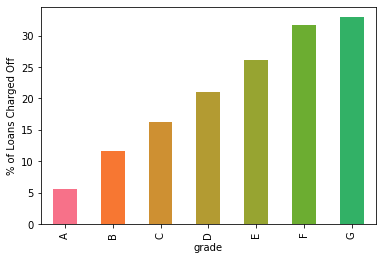

In [582]:
# We are checking 'grade' each bucket category count 
# against loan_status (default = 'Charged Off')
# Overall gross percenatge for each column
grp = master.groupby(['loan_status','grade'])['grade'].count()
cnt = master.groupby('grade')['grade'].count()
percentages = grp.unstack() * 100/cnt.T
plt = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% of Loans Charged Off')

#### Inference
- Nearly 30% of all loans in Grades F and G are charged off.
- Grade E onwards are risky.

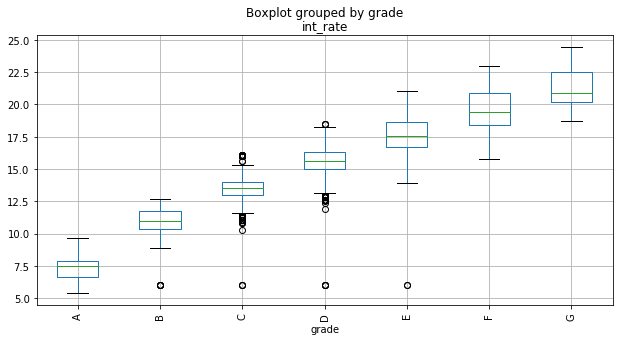

In [222]:
fig, ax = plt.subplots(figsize=(10,5))
master.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

#### Inference 
- charging higher interest rates for lower grade loans

#### 6. Variable- emp_length
Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [94]:
#Variable - emp_length
master.emp_length.value_counts()

10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: emp_length, dtype: int64

Text(0, 0.5, '% in Charged Off loans')

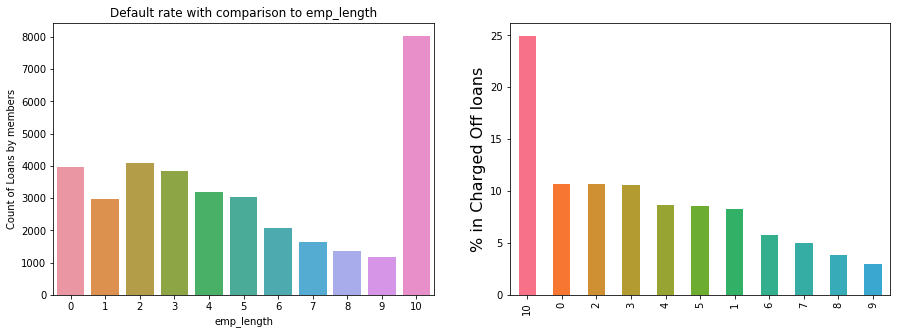

In [253]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(master['emp_length'], order=sorted(master.emp_length.unique()))
plt.xlabel("emp_length") 
plt.ylabel("Count of Loans by members") 
plt.title("Default rate with comparison to emp_length") 
plt.subplot(1, 2, 2)
values = round(master.loc[master['loan_status']=='Charged Off']['emp_length'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)

#### Inference
- 22.7% of the of loan taker have an employment length of more than 10 years.

#### 7. Variable - home_ownership
Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [254]:
#infering the analysis from home_ownership to check which category had the most loans
master.groupby('home_ownership').loan_amnt.count()

home_ownership
MORTGAGE    15703
OTHER          94
OWN          2505
RENT        17065
Name: loan_amnt, dtype: int64

Text(0, 0.5, '% in Charged Off loans')

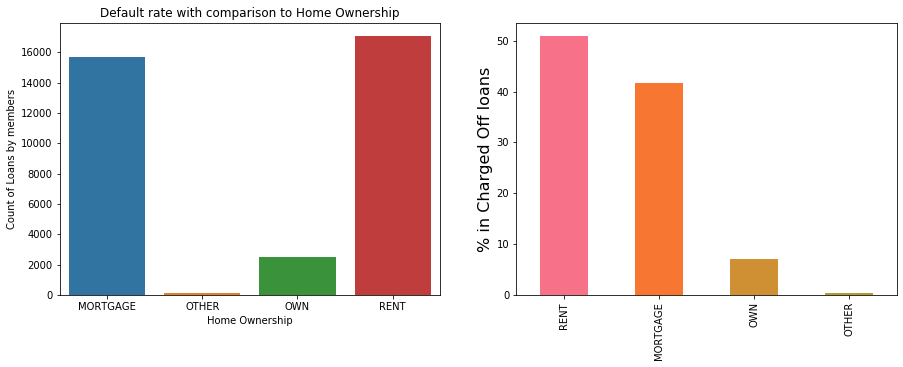

In [257]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(master['home_ownership'], order=sorted(master.home_ownership.unique()))
plt.xlabel("Home Ownership") 
plt.ylabel("Count of Loans by members") 
plt.title("Default rate with comparison to Home Ownership") 
plt.subplot(1, 2, 2)
values = round(master.loc[master['loan_status']=='Charged Off']['home_ownership'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)

#### Inference
-  Rent and mortgage were the most popular categories among customers for the loans and hence they seem to have the most defaulters in there

#### 8. Variable : annual_inc
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [101]:
#Variable - annual_inc
master.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

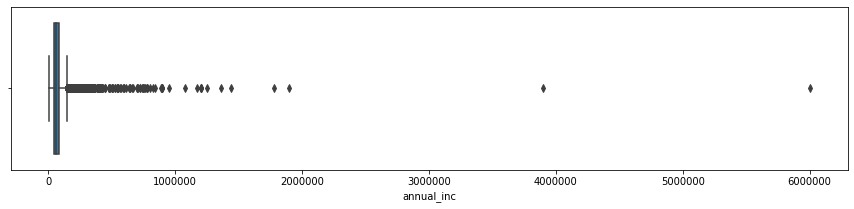

In [104]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=master['annual_inc'], data=master)

#### Inference
- The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000.
- Median annual income is around 60,000
- Most people have an annual income less than 115000. 

So need to handle the outliers, hence we grouped them into bins and have done further analysis in Bivariate Section.

In [451]:
def inc_range(df):
    if (df['annual_inc'] >= -10000) & (df['annual_inc'] < 20000):
               return '0-20000'
    elif (df['annual_inc'] >= 20000) & (df['annual_inc'] < 40000):
               return '20000-40000'
    elif (df['annual_inc'] >= 40000) & (df['annual_inc'] < 60000):
               return '40000-60000'
    elif (df['annual_inc'] >= 60000) & (df['annual_inc'] < 80000):
               return '60000-80000'
    elif (df['annual_inc'] >= 80000) & (df['annual_inc'] < 100000):
               return '80000-100000'
    elif (df['annual_inc'] >= 100000) & (df['annual_inc'] < 120000):
               return '100000-120000'
    elif (df['annual_inc'] >= 120000) & (df['annual_inc'] < 140000):
               return '120000-140000'        
    elif (df['annual_inc'] >= 140000) & (df['annual_inc'] < 160000):
               return '140000-160000'
    elif (df['annual_inc'] >= 160000) & (df['annual_inc'] < 180000):
               return '160000-180000'
    elif (df['annual_inc'] >= 180000) & (df['annual_inc'] < 200000):
               return '180000-200000'
    elif (df['annual_inc'] >= 200000) & (df['annual_inc'] < 250000):
               return '200000-250000'
    elif (df['annual_inc'] >= 250000) & (df['annual_inc'] < 500000):
               return '250000-500000'
    elif (df['annual_inc'] >= 500000) & (df['annual_inc'] < 1000000):
               return '180000-200000'
    elif (df['annual_inc'] >= 1000000) & (df['annual_inc'] < 5000000):
               return '1000000-5000000'                    
                    
master['annual_inc_range'] = master.apply(inc_range, axis = 1)

#### 9. Variable: verification_status
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [259]:
# analysing the total number of verification_status for the defaulters dataframe
master.groupby('verification_status').loan_status.count()

verification_status
Not Verified       14840
Source Verified     9164
Verified           11363
Name: loan_status, dtype: int64

Text(0, 0.5, '% in Charged Off loans')

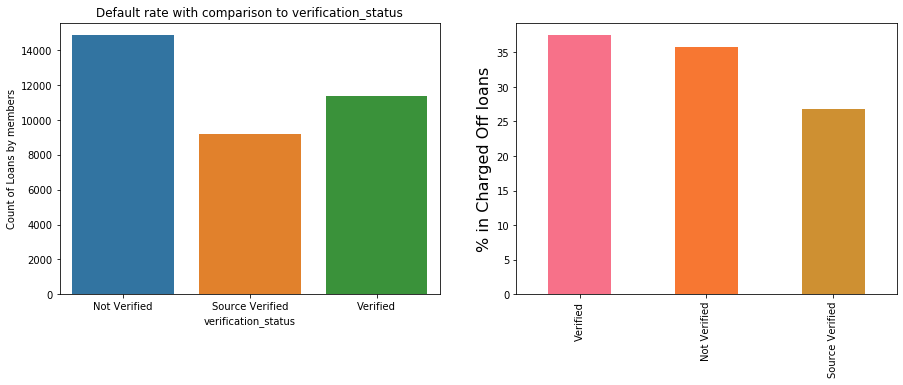

In [262]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(master['verification_status'], order=sorted(master.verification_status.unique()))
plt.xlabel("verification_status") 
plt.ylabel("Count of Loans by members") 
plt.title("Default rate with comparison to verification_status") 
plt.subplot(1, 2, 2)
values = round(master.loc[master['loan_status']=='Charged Off']['verification_status'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)

#### Inference 
-  From the defaulters dataframe as well, we can draw the same analysis where most loans are provided to the customers where the date is not verified which looks bit suspicious

#### 10. Variable: issue_d
Data_Dictionary: The month which the loan was funded

Text(0.5, 0, 'issue_d_year')

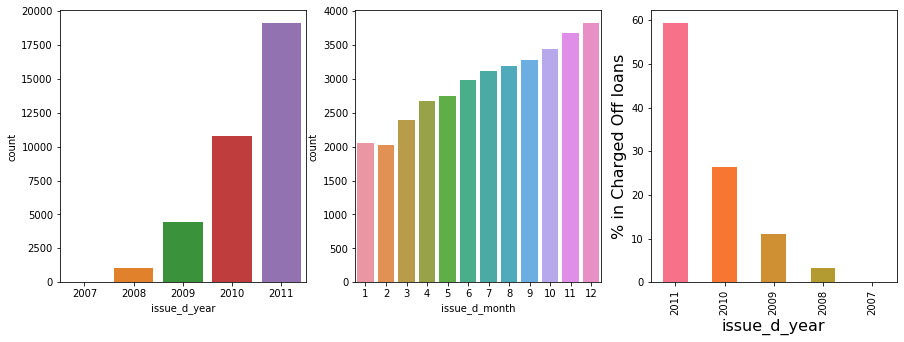

In [274]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(master['issue_d_year'], order=sorted(master.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(master['issue_d_month'], order=sorted(master.issue_d_month.unique()))

plt.subplot(1, 3, 3)
values = round(master.loc[master['loan_status']=='Charged Off']['issue_d_year'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)
plt.set_xlabel('issue_d_year', fontsize=16)


#### Inference
-  2011 the loans issued are most significant.
-  December is the month of the year were the maximum number of loans are being issued and that seems to be also month were most defaulters are seen.
- Within a year, the number of loan issued rose over the months(jan to Dec) in 2007 to 2008. and then onwards. 

#### 11. Variable - title
Data_Dictionary: The loan title provided by the borrower

In [275]:
master.title.value_counts().head(10)

Debt Consolidation           1975
Debt Consolidation Loan      1541
Personal Loan                 589
Consolidation                 462
debt consolidation            440
Credit Card Consolidation     325
Home Improvement              324
Debt consolidation            303
Personal                      281
Credit Card Loan              280
Name: title, dtype: int64

#### Inference
We are covering this under loan purpose mostly. Hence we can ignore this data column

#### 12. Variable - dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [394]:
master.dti.value_counts(normalize=True).head(5)

0.0     0.003958
12.0    0.001103
18.0    0.001074
19.2    0.001046
13.2    0.001018
Name: dti, dtype: float64

In [277]:
master.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

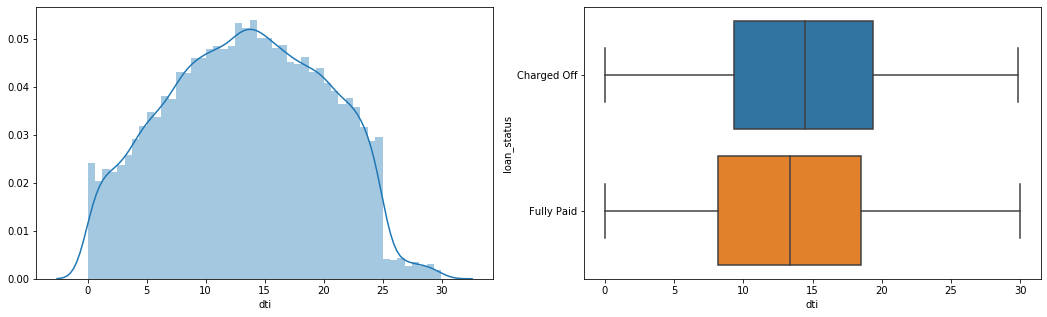

In [280]:
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(master['dti'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master['dti'], y=master['loan_status'], data=master)
plt.show()


In [353]:
def dti_range(df):
    if (df['dti'] >= 0) & (df['dti'] < 5):
               return '0-5'
    elif (df['dti'] >= 5) & (df['dti'] < 10):
               return '5-10'
    elif (df['dti'] >= 10) & (df['dti'] < 15):
               return '10-15'
    elif (df['dti'] >= 15) & (df['dti'] < 20):
               return '15-20'
    elif (df['dti'] >= 20) & (df['dti'] < 25):
               return '20-25'
    elif (df['dti'] >= 25) & (df['dti'] < 30):
               return '25-30'                  
                    
master['dti_range'] = master.apply(dti_range, axis = 1)

Text(0.5, 0, 'dti_range')

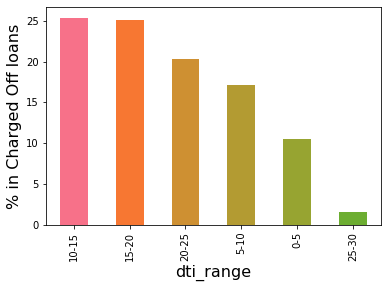

In [591]:
#plt.figure(figsize=(18,8))
values = round(master.loc[master['loan_status']=='Charged Off']['dti_range'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)
plt.set_xlabel('dti_range', fontsize=16)
#plt.tight_layout()


Text(0, 0.5, '% of Loans Charged Off')

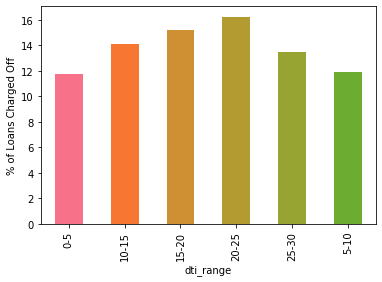

In [592]:
grp = master.groupby(['loan_status','dti_range'])['dti_range'].count()
cnt = master.groupby('dti_range')['dti_range'].count()
percentages = grp.unstack() * 100/cnt.T
plt = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% of Loans Charged Off')

#### Inference
- When the dti (dept payment to income ratio ) is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off 

#### 13. Variable - pub_rec
Data_Dictionary: Number of derogatory public records.

In [370]:
master.pub_rec.value_counts(normalize=True)

0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: pub_rec, dtype: float64

Text(0, 0.5, '% in Charged Off loans')

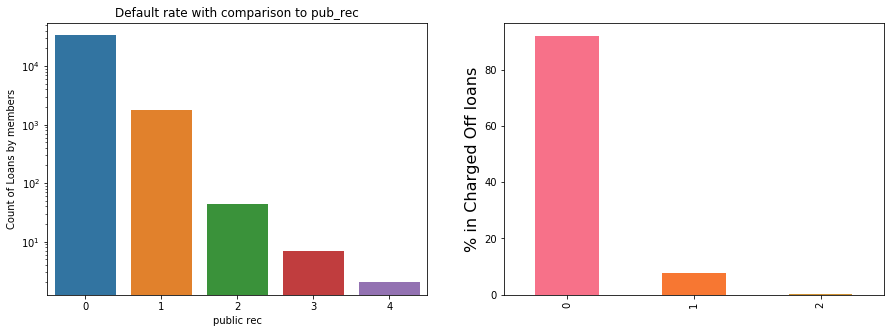

In [368]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
x = sns.countplot(master['pub_rec'], order=sorted(master.pub_rec.unique()))
x.set_yscale('log')
plt.xlabel("public rec") 
plt.ylabel("Count of Loans by members") 
plt.title("Default rate with comparison to pub_rec") 


Text(0, 0.5, '% of Loans Charged Off')

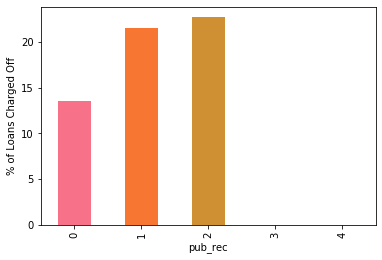

In [593]:
grp = master.groupby(['loan_status','pub_rec'])['pub_rec'].count()
cnt = master.groupby('pub_rec')['pub_rec'].count()
percentages = grp.unstack() * 100/cnt.T
plt = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% of Loans Charged Off')


#### Inference 
- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

#### 14. Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

Text(0.5, 1.0, 'Default rate with comparison to purpose')

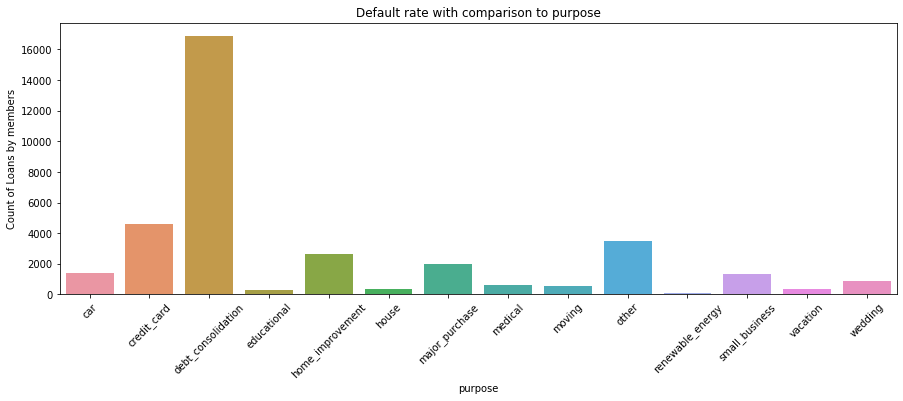

In [388]:
plt.figure(figsize=(15,5))
s0 = sns.countplot(master['purpose'], order=sorted(master.purpose.unique()))
plt.xlabel("purpose") 
plt.ylabel("Count of Loans by members") 
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)
plt.title("Default rate with comparison to purpose") 

Text(0.5, 0, 'Purpose')

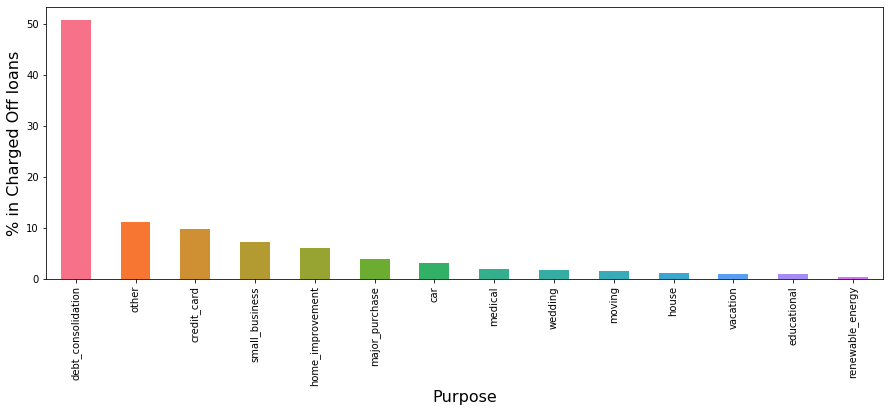

In [392]:
plt.figure(figsize=(15,5))
values = round(master.loc[master['loan_status']=='Charged Off']['purpose'].value_counts(normalize=True)*100,2)
plt = values.plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% in Charged Off loans', fontsize=16)
plt.set_xlabel('Purpose', fontsize=16)

#### Inference
- Most customers has taken the loan from lending for the purpose of debt consolidation
- 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

#### 15. Variable - earliest_cr_line.
Data_Dictionary: The month the borrower's earliest reported credit line was opened.

In [550]:
master['earliest_cr_line'].head()

0    1999-04-01
1    1996-02-01
3    2004-11-01
4    2005-07-01
5    2007-01-01
Name: earliest_cr_line, dtype: object

In [597]:
#extract the issue year and issue month fom the loan issue date-creating derived columns
master['earliest_cr_line_yr'] = pd.DatetimeIndex(master['earliest_cr_line']).year
master['earliest_cr_line_mnth'] = pd.DatetimeIndex(master['earliest_cr_line']).month

In [598]:
len(master[master['earliest_cr_line_yr'] > 2011 ])

49

In [599]:
master[master['earliest_cr_line_yr'] > 2011 ]['earliest_cr_line_yr'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [601]:
#This can be an issue with year or a y2k problem , so we can just convert it 
master.loc[master['earliest_cr_line_yr'] > 2011 , 'earliest_cr_line_yr'] = master['earliest_cr_line_yr'] - 100

Text(0, 0.5, '% of Loans Charged Off')

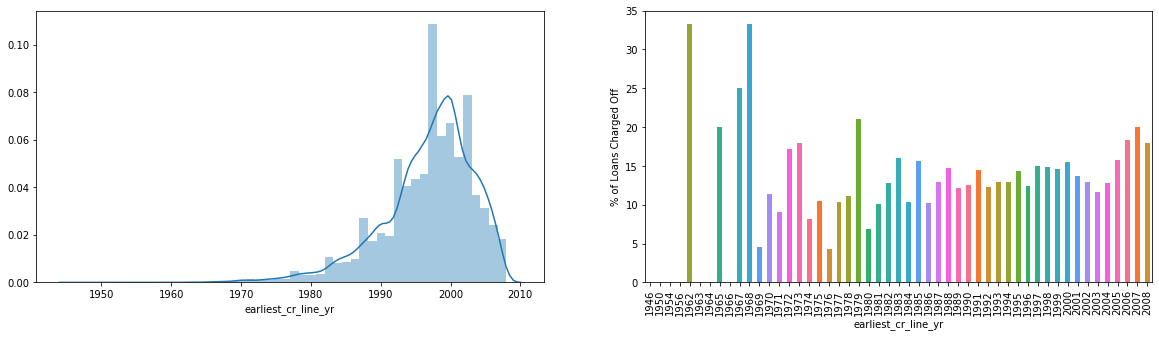

In [612]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(master['earliest_cr_line_yr'])
plt.subplot(1, 2, 2)
grp = master.groupby(['loan_status','earliest_cr_line_yr'])['earliest_cr_line_yr'].count()
cnt = master.groupby('earliest_cr_line_yr')['earliest_cr_line_yr'].count()
percentages = grp.unstack() * 100/cnt.T
plt = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% of Loans Charged Off')


#### Inference
- 8% of the loan applicants have 2000 as the year of earliest credit line.
- Considering a suitable year for which credit line was drawn as something from '1980' onwards.
  The trend is mostly that is considering new borrowers are defauling more often than the older customers.

#### 16. Variable - last_credit_pull_d
Data_Dictionary: The most recent month LC pulled credit for this loan.

In [619]:
master.last_credit_pull_d.value_counts().head()

2016-05-01    8718
2016-04-01    2232
2016-03-01    1058
2013-02-01     768
2016-02-01     683
Name: last_credit_pull_d, dtype: int64

In [620]:
master['last_credit_month'] = pd.DatetimeIndex(master['last_credit_pull_d']).month
master['last_credit_year'] = pd.DatetimeIndex(master['last_credit_pull_d']).year

In [621]:
master.last_credit_year.value_counts(normalize=True)

2016    0.375972
2014    0.161704
2015    0.145277
2013    0.134928
2012    0.105805
2011    0.053779
2010    0.017898
2009    0.004100
2008    0.000537
Name: last_credit_year, dtype: float64

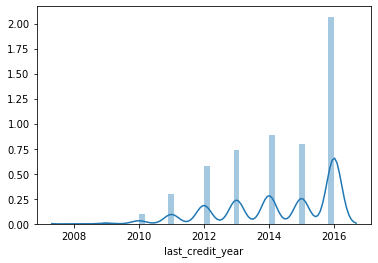

In [624]:
#plt.figure(figsize=(10,5))
sns.distplot(master['last_credit_year'])
#plt.show()

#### Inference
- more credit reports in recent years, suggesting that the company is taking bad loans more seriously
- Hence not much to consider this column.

#### 17. Variable - open_acc
Data_Dictionary: The number of open credit lines in the borrower's credit file.

In [417]:
master.open_acc.describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

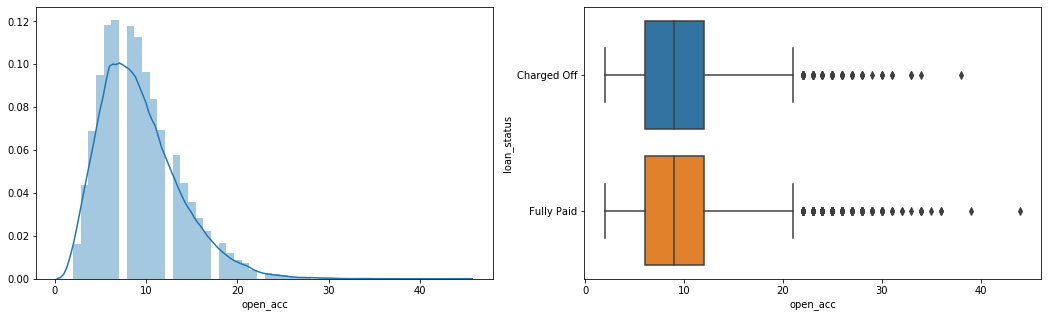

In [418]:
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(master['open_acc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master['open_acc'], y=master['loan_status'], data=master)
plt.show()

In [419]:
master.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


#### Inference
- The median of the distribution sugests that most of the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.

#### Ratio of loan amount/annual income & comparing with Loan Status.

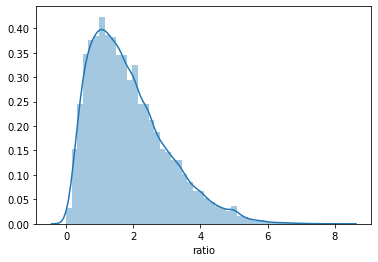

In [631]:
# Ratio of loan amt to annual income
master['ratio'] = master['loan_amnt'] * 10 / master['annual_inc']
master['ratio_loan_inc'] = (master['ratio'].astype(int)) * 10
sns.distplot(master['ratio'])

Text(0, 0.5, '% of Loans Charged Off')

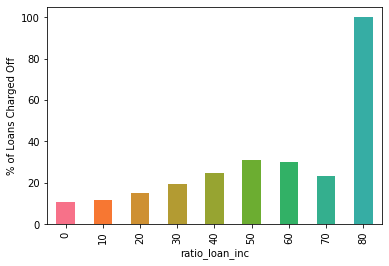

In [632]:
grp = master.groupby(['loan_status','ratio_loan_inc'])['ratio_loan_inc'].count()
cnt = master.groupby('ratio_loan_inc')['ratio_loan_inc'].count()
percentages = grp.unstack() * 100/cnt.T
plt = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
plt.set_ylabel('% of Loans Charged Off')


#### Inference
- As long as loan amount is less than 20% of annual income, defaults are low.

### BIVARIATE ANALYSIS

#### 1. loan_amnt over time

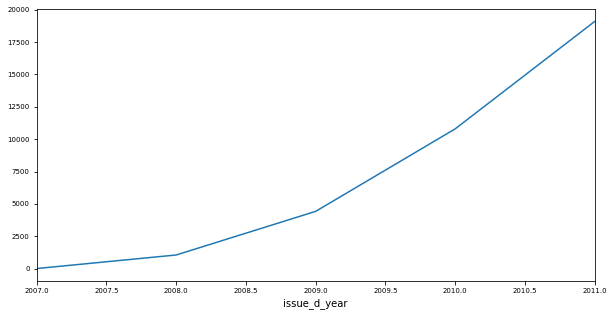

In [397]:
plt.figure(figsize=(10,5))
master.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

#### Inference
- The loan amount has increased considerably with the year for the Lending club

#### 2. loan_amnt and annual_inc

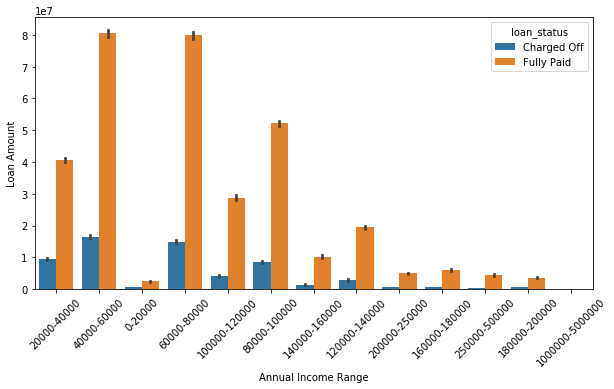

In [635]:
#fig, ax =plt.subplots(1,1,figsize=(15,5))
plt.figure(figsize=(10,5))
s0 = sns.barplot(x="annual_inc_range", y="loan_amnt", hue="loan_status", data=master, estimator=sum)
s0.set(xlabel='Annual Income Range',ylabel='Loan Amount')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

plt.show()

#### Inference
-  We see most of the loans being charged off (default) for the annual income range bins : (40k-60k) & (60k-80k) 
-

#### 3. loan_amnt vs grade

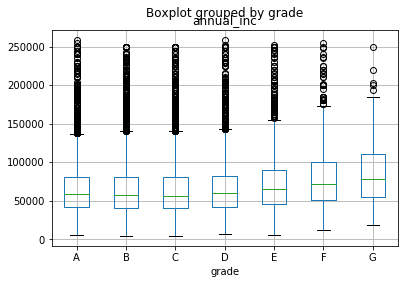

In [399]:
master.loc[master['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

#### Inference
- Larger loans generally appear to be given a lower grade, 
  with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

#### 4. dti vs open_acc

In [405]:
master.groupby('dti_range').open_acc.mean()

dti_range
0-5       6.839031
10-15     9.429680
15-20    10.206062
20-25    10.796797
25-30    11.214905
5-10      8.327196
Name: open_acc, dtype: float64

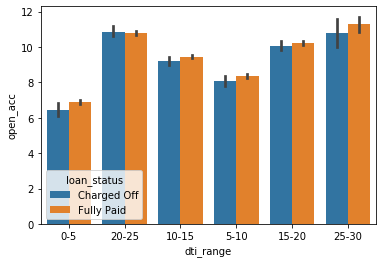

In [407]:
sns.barplot(x='dti_range', y='open_acc', hue='loan_status',data=master, estimator=np.mean)
plt.show()

#### Inference
- The dti increses with the number of open credit line in loan customer's file.

#### 5. Loan amount Vs term Vs Loan Status

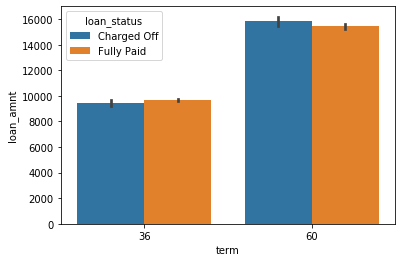

In [409]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=master, estimator=np.mean)
plt.show()

#### Inference
- Higher loan amount are associated with longer terms and see higher Charge Offs.

#### 6. Loan amount vs Grade vs Term

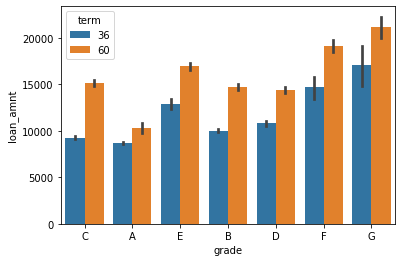

In [410]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master, estimator=np.mean)
plt.show()

#### Inference
- Higher loan amount are associated with lower grade for longer terms.

#### 7. loan_amnt vs verification_status vs loan status

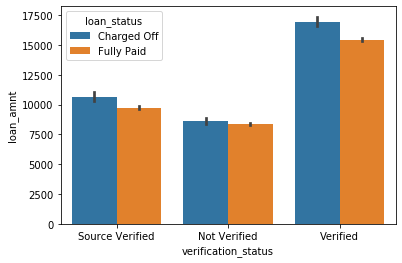

In [411]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master, estimator=np.mean)

#### Inference
- Higher loan amounts are Verified more often.
- It's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

#### 8. Interest Rate and Term

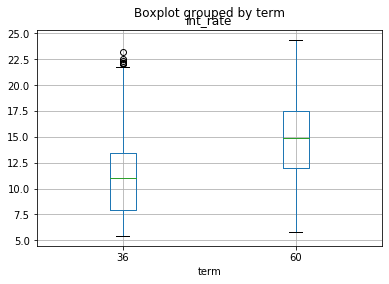

In [412]:
master.boxplot(column='int_rate', by='term')
plt.show()

#### Inference
- Larger amounts were seen to be given for higher term, hence rate of interest are higher.

#### 9. Interest Rate and Sub Grade

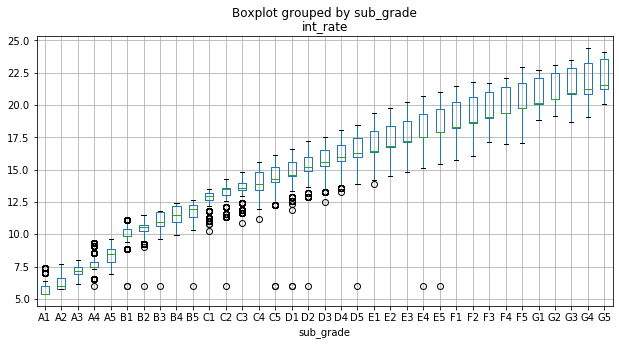

In [415]:
master.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

#### Inference
- Larger or worst the sub grade, higher are the rate of interest for the loan.

#### 10. Interest Rate and loan status

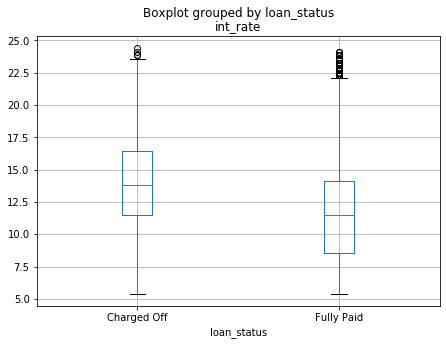

In [416]:
master.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

#### Inference
- Loans at a higher intrest rate are more likely to be Charged Off.

In [560]:
corr=master.corr()
corr['loan_amnt']

loan_amnt                  1.000000
term                       0.350011
int_rate                   0.299997
installment                0.930743
emp_length                 0.144922
annual_inc                 0.258984
dti                        0.063093
delinq_2yrs               -0.035290
inq_last_6mths             0.010000
open_acc                   0.174265
pub_rec                   -0.046942
revol_bal                  0.319781
revol_util                 0.067081
total_acc                  0.255773
out_prncp                       NaN
out_prncp_inv                   NaN
total_pymnt                0.884286
total_pymnt_inv            0.860199
total_rec_prncp            0.848788
total_rec_int              0.728815
total_rec_late_fee         0.046663
recoveries                 0.143550
collection_recovery_fee    0.079357
last_pymnt_amnt            0.477646
pub_rec_bankruptcies      -0.030431
issue_d_month              0.051358
issue_d_year               0.116198
last_credit_month          0

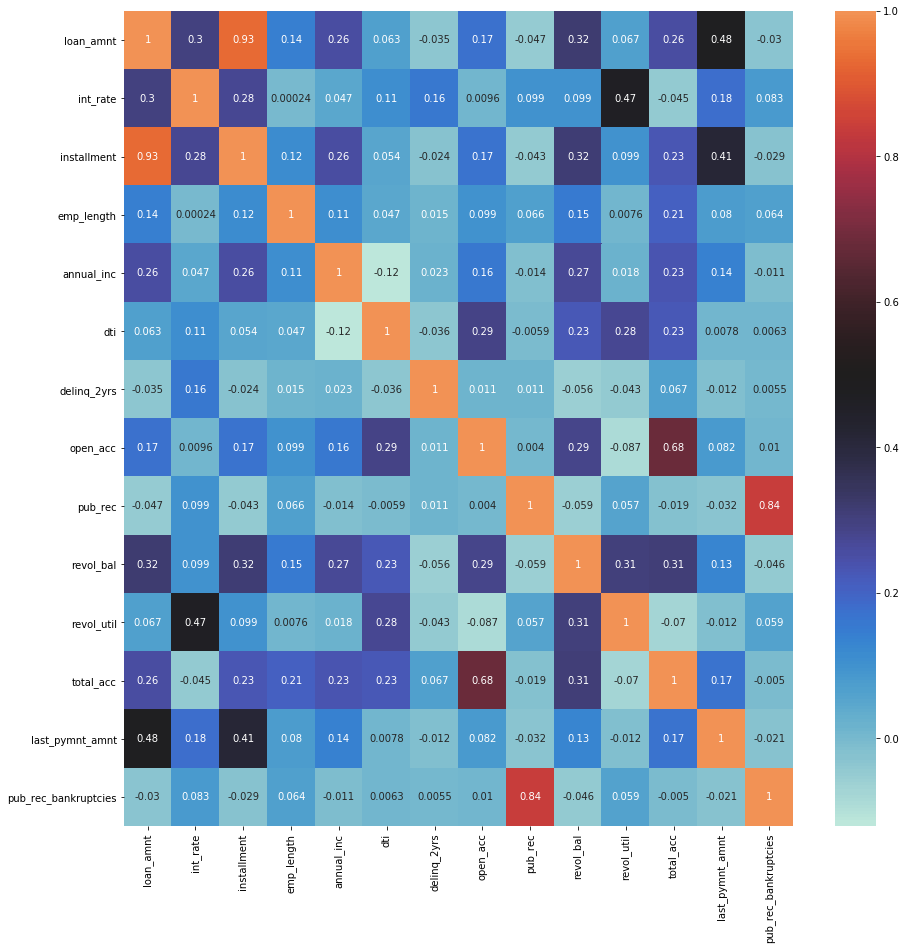

In [562]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

#### Inference
- 'int_rate' is correlated to 'revol_util' with r factor of .47 - 
  This is good, as company is charging higher interest from riskier loan.
- 'pub_rec_bankruptcies' is highly correlated to 'pub_rec' hence expected bankrupt client 
   who have higher derogatory public records
- 'last_payment_amnt' is well correlated to 'loan_amnt' & 'installment'